### Sartajdeep Singh 
### U20240121

#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
# Reading the image plaksha_Faculty.jpg
img = cv2.imread('Plaksha_Faculty.jpg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Applying the face detection method on the grayscale image.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

text = "Face"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.4
font_color = (0, 0, 255)
font_thickness = 1

for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(img, text, (x, y-5), font, font_scale, font_color, font_thickness)

cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

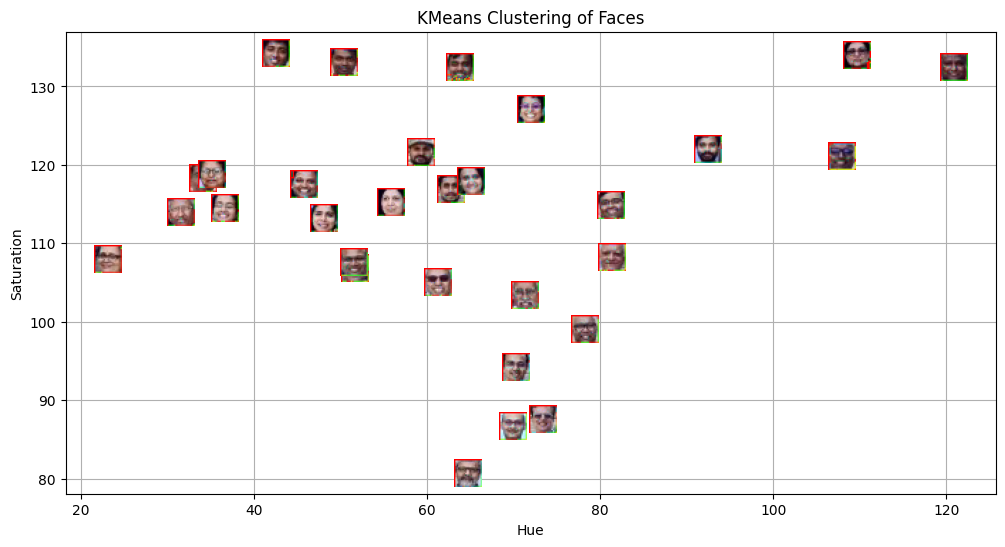

In [3]:
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue_saturation = []
face_images = []

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

# Perform k-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(hue_saturation)

fig, ax = plt.subplots(figsize=(12, 6))

for i, (x,y,w,h) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("KMeans Clustering of Faces")
plt.grid()
plt.show()

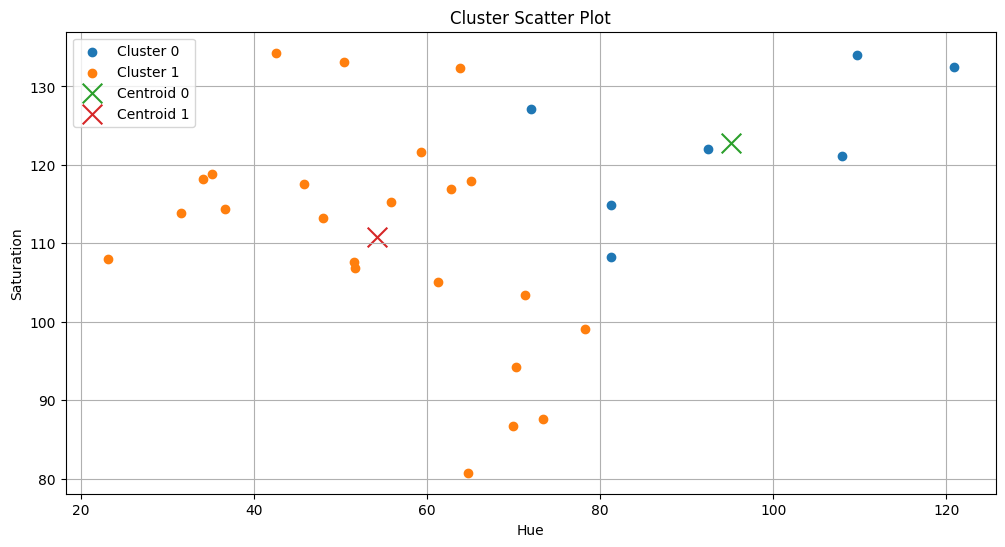

In [4]:
legend_labels = []

cluster_0_points = []
cluster_1_points = []

fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], label='Cluster 0')

cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], label='Cluster 1')

centroid_0 = cluster_0_points.mean(axis=0)
centroid_1 = cluster_1_points.mean(axis=0)

plt.scatter(centroid_0[0], centroid_0[1], marker='x', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], marker='x', s=200, label='Centroid 1')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Cluster Scatter Plot")
plt.legend()
plt.grid()
plt.show()

In [5]:
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, 1.05, 4)

for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2.imshow("Template Face Detection", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

(x, y, w, h) = template_faces[0]
face = template_hsv[y:y+h, x:x+w]

template_hue = face[:,:,0].mean()
template_saturation = face[:,:,1].mean()

template_label = kmeans.predict([[template_hue, template_saturation]])[0]

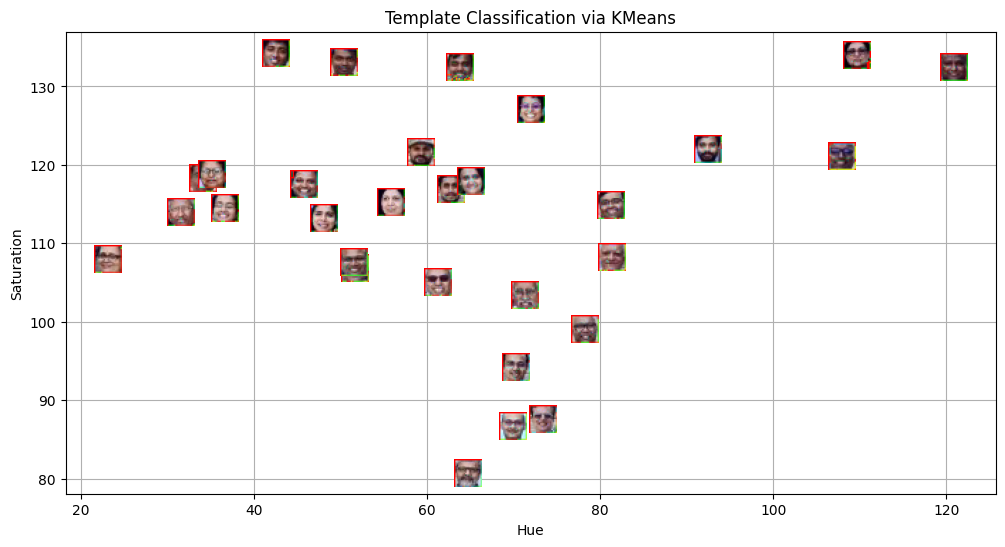

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Template Classification via KMeans")
plt.grid()
plt.show()

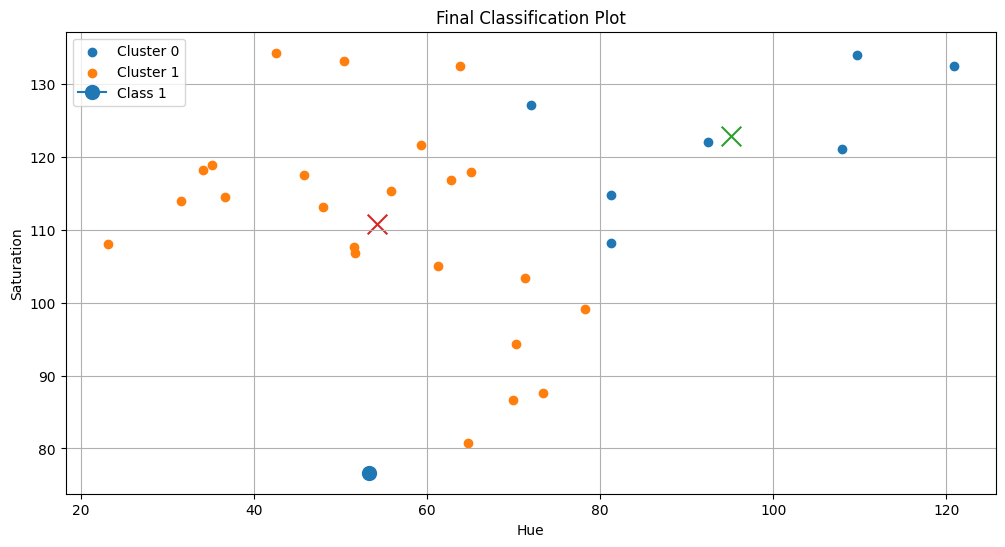

In [8]:
cluster_0_points = []
cluster_1_points = []

fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
cluster_1_points = np.array(cluster_1_points)

plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], label='Cluster 0')
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], label='Cluster 1')

centroid_0 = cluster_0_points.mean(axis=0)
centroid_1 = cluster_1_points.mean(axis=0)

plt.scatter(centroid_0[0], centroid_0[1], marker='x', s=200)
plt.scatter(centroid_1[0], centroid_1[1], marker='x', s=200)

plt.plot(template_hue, template_saturation, marker='o', markersize=10, label=f'Class {template_label}')

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Final Classification Plot")
plt.legend()
plt.grid()
plt.show()

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

#### 2. What are some real-world applications of distance-based classification algorithms? 

#### 3. Explain various distance metrics. 

#### 4. What is the role of cross validation in model performance? 

#### 5. Explain variance and bias in terms of KNN? 

### Answer1
Distance-based classification algorithms commonly use Euclidean, Mahalanobis, Manhattan, Chebyshev, Minkowski, Cosine, and Hamming metrics

### Answer 2 
These algorithms are used for customer behavior prediction, document classification, spam filtering, image and disease classification, face recognition, and autonomous driving.

### Answer 3 
Euclidean distance calculates the straight-line distance between two points but does not look at how data is distributed. <br>
Mahalanobis distance is more advanced because it accounts for variance and correlations in the data, essentially measuring how many standard deviations a point is from the average.<br> Manhattan distance measures distance along axes at right angles and is often better for very high-dimensional data where points are sparse.<br> Chebyshev distance looks only at the single largest difference between coordinates. <br> Minkowski distance is a general formula that can be turned into Manhattan, Euclidean, or Chebyshev distance by changing a single value, $p$.<br> Cosine distance measures the angle between vectors, which is useful when the size doesn't matter as much as the direction, such as comparing documents. <br> Hamming distance is the simplest, counting how many positions are different between two strings or sets of bits.

### Answer 4
Cross-validation is used to check model performance by repeatedly breaking the training data into smaller sets called training and validation sets. This process allows you to test the model many times before using the final test set. In K-NN specifically, you use a portion of the data for validation to try out different values of $K$ and see which one gives the best results. This helps in finding the optimal $K$ to ensure the model makes accurate predictions without failing on new data.

### Answer 5 
In K-NN, a low K value increases variance and makes the model sensitive to noise or outliers, which can lead to overfitting. Conversely, a high K value increases bias and produces smoother boundaries, but if it is too large, the model may underfit by only predicting the majority class.
